### Import the libraries

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import matplotlib.pyplot as plt
import numpy as np

In [3]:
in_shape = (100, 100, 3) # input shape 3 chanels color image

In [4]:
model = Sequential()

2023-01-12 18:34:56.526186: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-12 18:34:56.526233: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-12 18:34:56.526264: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (austiniqer-82b5): /proc/driver/nvidia/version does not exist
2023-01-12 18:34:56.526590: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=in_shape))

In [6]:
model.add(MaxPool2D(pool_size=(2,2)))

In [7]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

In [8]:
model.add(MaxPool2D(pool_size=(2,2)))

In [9]:
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

In [10]:
model.add(MaxPool2D(pool_size=(2,2)))

In [11]:
model.add(Flatten())

In [12]:
model.add(Dense(units=3, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

### List Kernel or Filter or Mask in *Model.layers*

In [14]:
for layer in model.layers:
	print(layer)

In [15]:
for layer in model.layers:
	if 'conv' not in layer.name:
		continue
	kernels, biases = layer.get_weights()
	print(layer.name,'shape:', kernels.shape)

conv2d shape: (3, 3, 3, 32)
conv2d_1 shape: (3, 3, 32, 64)
conv2d_2 shape: (3, 3, 64, 128)


In [16]:
model_layer_idx = 0
kernels, biases = model.layers[model_layer_idx].get_weights()
kernels.shape

(3, 3, 3, 32)

In [17]:
k_min, k_max = kernels.min(), kernels.max()
kernels = (kernels - k_min) / (k_max - k_min)
kernel_idx = 0
kernel_i = kernels[:, :, 0, kernel_idx]
print(kernel_i.round(2))

[[0.35 0.51 0.04]
 [0.3  0.66 0.16]
 [0.76 0.88 0.66]]


([], [])

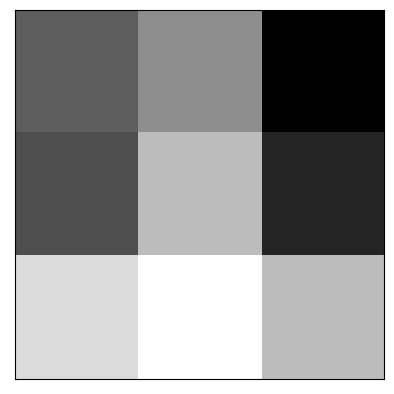

In [18]:
plt.imshow(kernel_i, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])

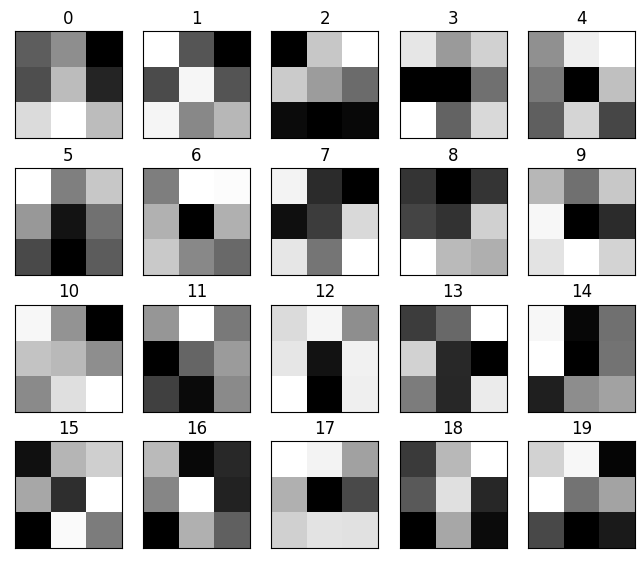

In [19]:
nplots = 20
fig = plt.figure(figsize=(8, 6.8))
for j in range(nplots):
	plt.subplot(4, 5, j+1)
	plt.imshow(kernels[:, :, 0, j], cmap=plt.cm.gray)
	plt.title(j)
	plt.xticks([])
	plt.yticks([])
plt.show()

In [20]:
print('done')

done
